In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('dataset02.csv')
x = df.values[:,:-1]
y = df.values[:,-1]
x_train = x[:230,:]
y_train = y[:230]
x_test = x[230:,:]
y_test = y[230:]

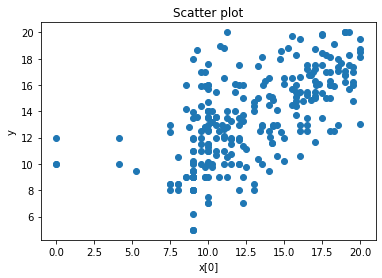

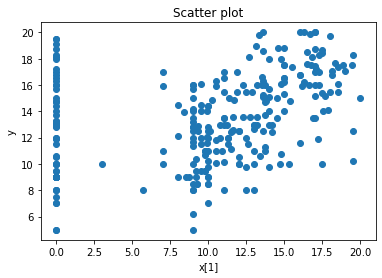

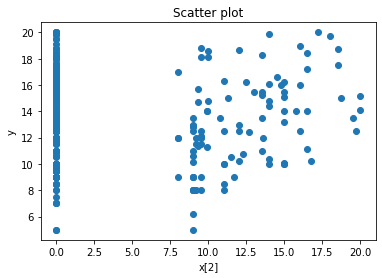

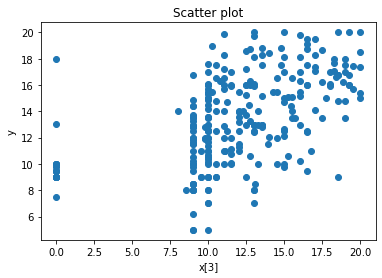

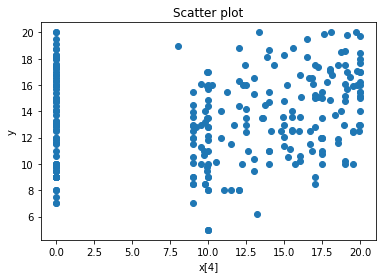

In [70]:
for i in range(5):
    plt.scatter(x[:,i], y)
    plt.title('Scatter plot')
    plt.xlabel('x['+str(i)+']')
    plt.ylabel('y')
    plt.show()


In [71]:
# filling missing
x_filled = x.copy()
for i in range(5):
    for j in range(271):
        if x[j,i]==0:
            other_grades = np.nonzero(x[j,:])[0]
#             print(other_grades)
            if len(other_grades)!= 0:
#                 print(other_grades)
                mean = np.mean(x[j,other_grades])
                var = np.var(x[j,other_grades])
                x_filled[j,i] = np.clip(np.random.normal(mean,var),0,20)
            else:
#                 print('hi')
                alternative = y[j]
#                 if y[j]==0:
#                     print('dude')
                x_filled[j,i] = alternative
            


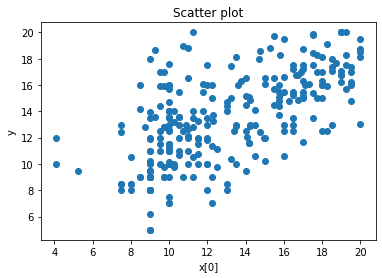

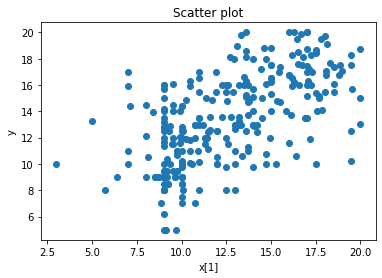

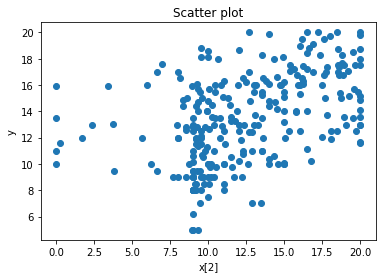

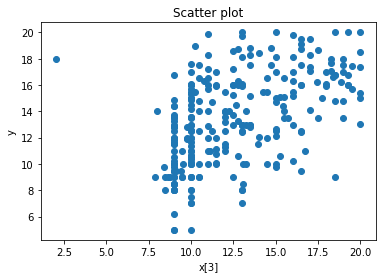

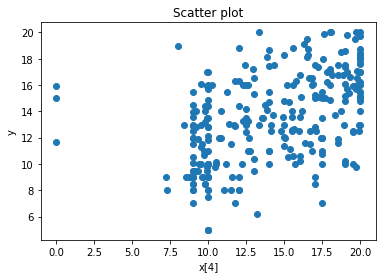

In [72]:
for i in range(5):
    plt.scatter(x_filled[:,i], y)
    plt.title('Scatter plot')
    plt.xlabel('x['+str(i)+']')
    plt.ylabel('y')
    plt.show()
x = x_filled
x_train = x_filled[:230,:]
x_test = x_filled[230:,:]


Alpha 0.1 , lasso 111.9964725896285 , R2 0.6194263422202322 , RSS 223.8188304323388
Alpha 0.2 , lasso 109.75103423988621 , R2 0.6273144563414119 , RSS 219.17975875507383
Alpha 0.3 , lasso 107.75733958626978 , R2 0.6343023838172892 , RSS 215.07009503341413
Alpha 0.4 , lasso 106.70746228162557 , R2 0.6380868307680596 , RSS 212.84442735242916
Alpha 0.5 , lasso 106.07497390714566 , R2 0.6404619487912664 , RSS 211.44759883520018
Alpha 0.6 , lasso 105.50986409868702 , R2 0.6426006036560754 , RSS 210.18983645266295
Alpha 0.7 , lasso 105.0121248339898 , R2 0.6445028226314116 , RSS 209.07112416771466
Alpha 0.8 , lasso 104.58175611305408 , R2 0.6461686057172745 , RSS 208.09146198035543
Alpha 0.9 , lasso 104.21875793587981 , R2 0.6475979529136645 , RSS 207.25084989058522
Alpha 1 , lasso 103.92313030246694 , R2 0.6487908642205817 , RSS 206.5492878984039


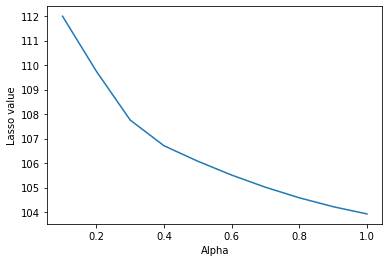

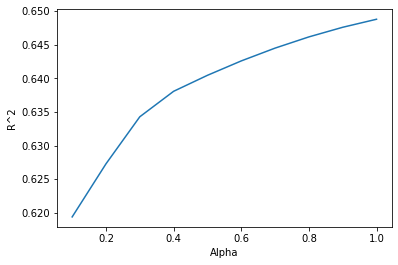

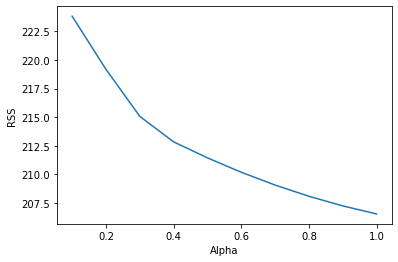

In [76]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
lassos = []
R2 = []
RSS = []
for alpha in alpha_values:
    clf = linear_model.Lasso(alpha=alpha, fit_intercept=True)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    lasso = (1/2) * len(y_test)*mean_squared_error(y_test,pred) + alpha * np.sum(np.abs(clf.coef_))
    lassos.append(lasso)
    R2.append(r2_score(y_test,pred))
    RSS.append(len(y_test) * mean_squared_error(y_test,pred))
    print('Alpha',alpha,', lasso',lassos[-1],', R2',R2[-1],', RSS',RSS[-1])
plt.plot(alpha_values,lassos)
plt.xlabel('Alpha')
plt.ylabel('Lasso value')
plt.show()
plt.plot(alpha_values,R2)
plt.xlabel('Alpha')q
plt.ylabel('R^2')
plt.show()
plt.plot(alpha_values,RSS)
plt.xlabel('Alpha')
plt.ylabel('RSS')
plt.show()

In [77]:
df2 = pd.read_csv('Dataset2_Unlabeled.csv')
x2 = df2.values

x2_filled = x2.copy()
# fill this one too ?
for i in range(5):
    mean = np.mean(x2[np.nonzero(x2[:,i])])
    sigma = np.sqrt(np.var(x2[np.nonzero(x2[:,i])]))
#     print(mean,sigma)
    for j in range(len(x2)):
        if x2[j,i]==0:
            x2_filled[j,i] = np.random.normal(loc=mean,scale=sigma)

clf = linear_model.Lasso(alpha=0.3, fit_intercept=True)
clf.fit(x_filled,y)
pred = clf.predict(x2_filled)
pd.DataFrame(pred).to_csv("dataset02_mylabel.csv",index=False,header=False)
print(clf.coef_)
print(clf.intercept_)

[ 0.26044243  0.16956919  0.01910654 -0.          0.          0.23952056]
4.775340859937703


In [75]:
df3 = pd.read_csv('Dataset2_extended.csv')
x3 = df3.values[:,:-1]
y3 = df3.values[:,-1]


clf = linear_model.Lasso(alpha=0.001, fit_intercept=True)
clf.fit(x3,y3)
print(clf.coef_)
print(clf.intercept_)


[ 0.40879778  0.36553363  0.31624635  0.16623811 -0.04232049 -0.11576859
  0.1673689 ]
-2.26942675112036
